# Classification

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

### Data Input

In [2]:
data = pd.read_csv("C:\\Users\\deepa\\Desktop\\Classification\\data.csv")
data.drop(['User ID'],axis=1,inplace=True) ##Droped User Id as it had no use in making predictions.
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


### Visualizing the dataset

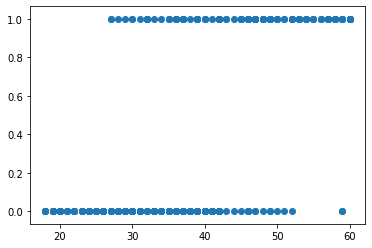

In [3]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()

### Divide the data to training set and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

## Creating the logistic regression model

In [5]:
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

### Method to Train the model 

In [6]:
def logistic_regression(X, Y):
    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    return b0, b1

### Training the model

In [7]:
b0, b1 = logistic_regression(X_train, y_train)

### Making predictions

In [8]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

### Visualizing the Prediction

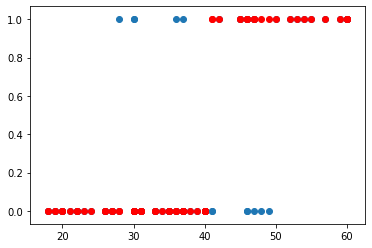

In [9]:
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

### Accuracy Check

In [10]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.85
